<a href="https://colab.research.google.com/github/cxrles/Covid-non_Covid-dataset/blob/main/Proyek_Kelompok_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Pengerjaan proyek Kelompok 5
Kami Menyarankan untuk membuka notebook ini dengan menggunakan google colab

Untuk Mempercepat proses training nantinya gunakanlah GPU dalam prosesnya. Untuk mengaktifkannya lakukan:

Edit>>Notebook settings >>Hardware accelerator:GPU


## Import Module standar yang akan digunakan

In [1]:
pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install keract 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns
from keract import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mendapatkan data set

In [5]:
import zipfile
import os

In [6]:

!wget --no-check-certificate \
    "https://github.com/cxrles/Covid-non_Covid-dataset/archive/refs/heads/main.zip" \
    -O "/tmp/Covid-non_Covid.zip"


zip_ref = zipfile.ZipFile("/tmp/Covid-non_Covid.zip", 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-06-06 04:25:46--  https://github.com/cxrles/Covid-non_Covid-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/cxrles/Covid-non_Covid-dataset/zip/refs/heads/main [following]
--2022-06-06 04:25:46--  https://codeload.github.com/cxrles/Covid-non_Covid-dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/Covid-non_Covid.zip’

/tmp/Covid-non_Covi     [            <=>     ] 488.60M  17.6MB/s    in 28s     

2022-06-06 04:26:14 (17.5 MB/s) - ‘/tmp/Covid-non_Covid.zip’ saved [512337722]



## meload semua path dari data

In [7]:
levels = ['Normal', 'COVID']
path = "/tmp/Covid-non_Covid-dataset-main/Data"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path  + "/" + data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Negative', 'COVID': 'Positive'})

data.head()

,image_file,corona_result,path
0,Normal/Normal-8695.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
1,Normal/Normal-812.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
2,Normal/Normal-8817.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
3,Normal/Normal-8549.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...
4,Normal/Normal-9211.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...


In [8]:
data.shape

(13808, 3)

## Preprocessing data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Negative    10192
Positive     3616
Name: corona_result, dtype: int64

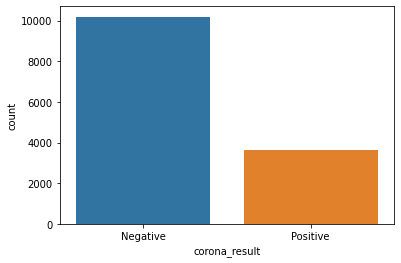

In [9]:
sns.countplot(data['corona_result']) #distribusi data
data['corona_result'].value_counts()

In [10]:
negative_cases= data[data['corona_result']== 'Negative']
positive_cases= data[data['corona_result']== 'Positive']
#downsampling
from sklearn.utils import resample
downsample = resample(negative_cases,
             replace=True,
             n_samples=len(positive_cases),
             random_state=42)

print(downsample.shape)
data= pd.concat([downsample,positive_cases])

data=data.reset_index()
data=data.drop('index', axis=1)

(3616, 3)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Negative    3616
Positive    3616
Name: corona_result, dtype: int64

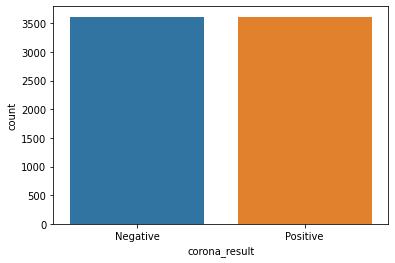

In [11]:
sns.countplot(data['corona_result']) #distribusi data
data['corona_result'].value_counts()

In [12]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x)))
data['image']= data['image'].map(lambda x: x.reshape(299,299,1))

data.head()

,image_file,corona_result,path,image
0,Normal/Normal-8124.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[6], [5], [4], [4], [3], [2], [2], [2], [2],..."
1,Normal/Normal-6481.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[238], [219], [198], [181], [170], [161], [1..."
2,Normal/Normal-8814.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[131], [124], [96], [54], [17], [2], [0], [0..."
3,Normal/Normal-8959.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[22], [21], [21], [20], [18], [17], [17], [1..."
4,Normal/Normal-9531.png,Negative,/tmp/Covid-non_Covid-dataset-main/Data/Normal/...,"[[[7], [7], [7], [7], [7], [7], [6], [7], [7],..."


Negative


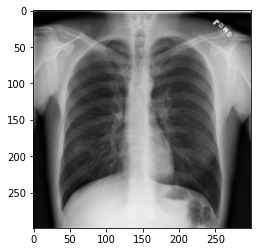

In [13]:
plt.imshow(data['image'][1].reshape(299,299),cmap='gray')
print(data['corona_result'][1])

## Membuat Model

In [14]:
all_data=[]

for i in range (len(data)):
    y=1
    if data['corona_result'][i]== 'Negative':
        y=0
    
    all_data.append([data['image'][i],y])
    

In [15]:
x = []
y = []
for image, label in all_data:
    x.append(image)
    y.append(label)

x = np.array(x)
y = np.array(y)


In [16]:


# 70% of data is training data, set aside other 30%
x_train, x_OTHER, y_train, y_OTHER = train_test_split(x, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
x_eval, x_test, y_eval, y_test = train_test_split(x_OTHER, y_OTHER, test_size=0.5, random_state=101)

print(x_train.shape, x_test.shape, x_eval.shape, y_train.shape, y_test.shape, y_eval.shape)



(5062, 299, 299, 1) (1085, 299, 299, 1) (1085, 299, 299, 1) (5062,) (1085,) (1085,)


In [17]:
def kel5net(): #proposed model
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               padding='same', input_shape=(299,299,1)),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2,activation='softmax')])
    



In [18]:
net=kel5net()
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [19]:
test_input = tf.random.uniform((1, 299, 299, 1))
a=net(test_input)
print(a)
print(sum(sum(a)))

tf.Tensor([[0.4983635 0.5016365]], shape=(1, 2), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [20]:

net.compile(optimizer = 'adam', 
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
           metrics = ['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)




History= net.fit(x_train, y_train, 
                        epochs = 50, batch_size=64,
                        validation_data = (x_eval, y_eval),callbacks=[es]
                        )

Epoch 1/50
80/80 [==============================] - 14s 139ms/step - loss: 1.7665 - accuracy: 0.7309 - val_loss: 0.4454 - val_accuracy: 0.7982
Epoch 2/50
80/80 [==============================] - 10s 126ms/step - loss: 0.3976 - accuracy: 0.8339 - val_loss: 0.2907 - val_accuracy: 0.8765
Epoch 3/50
80/80 [==============================] - 10s 129ms/step - loss: 0.3212 - accuracy: 0.8722 - val_loss: 0.2426 - val_accuracy: 0.8977
Epoch 4/50
80/80 [==============================] - 10s 130ms/step - loss: 0.2751 - accuracy: 0.8910 - val_loss: 0.2059 - val_accuracy: 0.9235
Epoch 5/50
80/80 [==============================] - 10s 130ms/step - loss: 0.2203 - accuracy: 0.9156 - val_loss: 0.2111 - val_accuracy: 0.9281
Epoch 6/50
80/80 [==============================] - 10s 129ms/step - loss: 0.1942 - accuracy: 0.9241 - val_loss: 0.1912 - val_accuracy: 0.9318
Epoch 7/50
80/80 [==============================] - 10s 128ms/step - loss: 0.1648 - accuracy: 0.9358 - val_loss: 0.1960 - val_accuracy: 0.9336

In [21]:
net.save('/content/drive/MyDrive/proyek_Kelompok5/net')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/proyek_Kelompok5/net/assets


## Performance Analysis

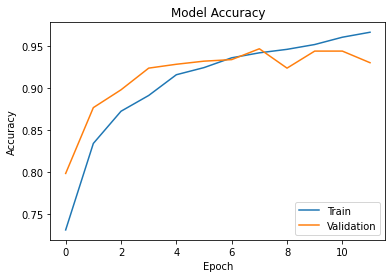

In [22]:
# Summarize History for Accuracy

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.savefig('/content/drive/MyDrive/proyek_Kelompok5/his_acc')

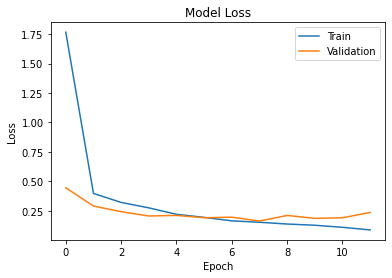

In [23]:
# Summarize History for Loss

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.savefig('/content/drive/MyDrive/proyek_Kelompok5/loss_acc')

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

In [25]:
def report_model(model,x_test,y_test,naming,tittle):
  yp_test = model.predict(x_test)
  yp_test = np.argmax(yp_test, axis = 1)
  cm=confusion_matrix(yp_test,y_test)
  plt.matshow(cm)
  plt.title(tittle)
  plt.colorbar()
  plt.ylabel('True Label')
  plt.xlabel('Predicated Label')
  for (x, y), value in np.ndenumerate(cm):
    plt.text(x, y, f"{value}", va="center", ha="center", c='blue')
  plt.savefig(f'/content/drive/MyDrive/proyek_Kelompok5/{naming}')
  print(classification_report(y_test, yp_test))



Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       540
           1       0.97      0.91      0.94       545

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



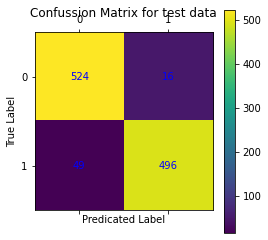

In [26]:
print("\nClassification Report for Test Data\n")
report_model(net,x_test,y_test, "testdata", 'Confussion Matrix for test data') 


Classification Report for Validation data 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       544
           1       0.97      0.89      0.93       541

    accuracy                           0.93      1085
   macro avg       0.93      0.93      0.93      1085
weighted avg       0.93      0.93      0.93      1085



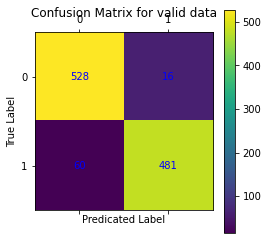

In [27]:
print("\nClassification Report for Validation data \n")
report_model(net,x_eval,y_eval,"validata", "Confusion Matrix for valid data")


Classification Report for training data 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2532
           1       0.99      0.95      0.97      2530

    accuracy                           0.97      5062
   macro avg       0.97      0.97      0.97      5062
weighted avg       0.97      0.97      0.97      5062



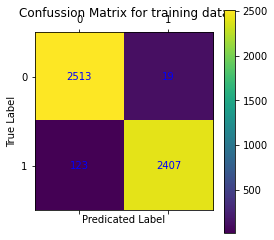

In [28]:
print("\nClassification Report for training data \n")
report_model(net,x_train, y_train,"traindata","Confussion Matrix for training data")

In [30]:
activation = get_activations(net, x_test[19].reshape(1,299,299,1))

In [37]:
display_activations(activation,cmap='gray', save=True, directory='/content/drive/MyDrive/proyek_Kelompok5/activation')

conv2d_input (1, 299, 299, 1) 
conv2d (1, 299, 299, 32) 
max_pooling2d (1, 149, 149, 32) 
conv2d_1 (1, 149, 149, 32) 
max_pooling2d_1 (1, 74, 74, 32) 
conv2d_2 (1, 74, 74, 32) 
max_pooling2d_2 (1, 37, 37, 32) 
conv2d_3 (1, 37, 37, 32) 
max_pooling2d_3 (1, 18, 18, 32) 
flatten (1, 10368) 
dense (1, 64) 
dropout (1, 64) 
dense_1 (1, 2) 


In [36]:
display_heatmaps(activation,x_test[19],save=True, directory='/content/drive/MyDrive/proyek_Kelompok5/Heatmap')

conv2d_input (1, 299, 299, 1) 
conv2d (1, 299, 299, 32) 
max_pooling2d (1, 149, 149, 32) 
conv2d_1 (1, 149, 149, 32) 
max_pooling2d_1 (1, 74, 74, 32) 
conv2d_2 (1, 74, 74, 32) 
max_pooling2d_2 (1, 37, 37, 32) 
conv2d_3 (1, 37, 37, 32) 
max_pooling2d_3 (1, 18, 18, 32) 
flatten (1, 10368) -> Skipped. 2D Activations.
dense (1, 64) -> Skipped. 2D Activations.
dropout (1, 64) -> Skipped. 2D Activations.
dense_1 (1, 2) -> Skipped. 2D Activations.
